In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Load the dataset
from keras.datasets import cifar10
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 93s 1us/step


In [3]:
print(type(X_train))

<class 'numpy.ndarray'>


In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

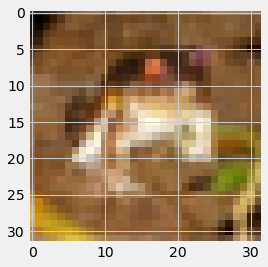

In [7]:
img = plt.imshow(X_train[0])

In [8]:
y_train[0]

array([6], dtype=uint8)

In [10]:
classification = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
classification[y_train[0][0]]

'frog'

In [11]:
# Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [12]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [14]:
# Normalize the pixels to be values between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [16]:
# Creating Model
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(5,5),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())

model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [17]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [18]:
hist = model.fit(X_train, y_train_one_hot,
                batch_size = 256,
                epochs = 10,
                validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 44s 280ms/step - loss: 1.8213 - accuracy: 0.3214 - val_loss: 1.4788 - val_accuracy: 0.4572
Epoch 2/10
157/157 [==============================] - 43s 271ms/step - loss: 1.4443 - accuracy: 0.4715 - val_loss: 1.3172 - val_accuracy: 0.5187
Epoch 3/10
157/157 [==============================] - 42s 264ms/step - loss: 1.3000 - accuracy: 0.5294 - val_loss: 1.2235 - val_accuracy: 0.5669
Epoch 4/10
157/157 [==============================] - 42s 268ms/step - loss: 1.1926 - accuracy: 0.5735 - val_loss: 1.0980 - val_accuracy: 0.6108
Epoch 5/10
157/157 [==============================] - 42s 268ms/step - loss: 1.0936 - accuracy: 0.6098 - val_loss: 1.0522 - val_accuracy: 0.6300
Epoch 6/10
157/157 [==============================] - 42s 267ms/step - loss: 1.0258 - accuracy: 0.6366 - val_loss: 1.0478 - val_accuracy: 0.6295
Epoch 7/10
157/157 [==============================] - 43s 277ms/step - loss: 0.9839 - accuracy: 0.6538 - val_loss: 0.9947 - val_ac

In [19]:
model.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 13ms/step - loss: 1.0068 - accuracy: 0.6572


0.6571999788284302

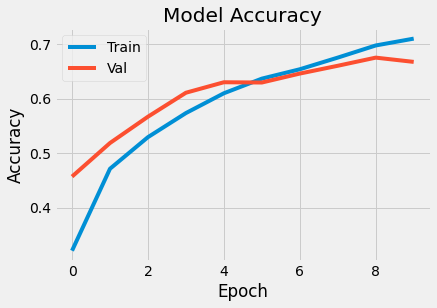

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

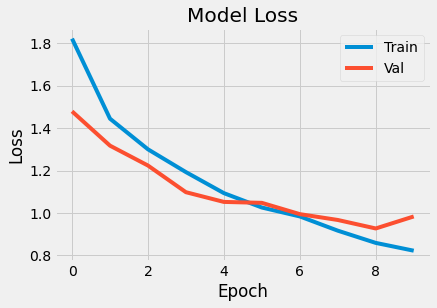

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [24]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [25]:
new_image = plt.imread('cat.jpg')
img = plt.imshow(new_image)

FileNotFoundError: [Errno 2] No such file or directory: 'cat.jpg'

In [26]:
# Resize the image as 32,32,3
from skimage.transform import resize
resized_image = resize(new_image,(32,32,3))
img = plt.imshow(resized_image)

ModuleNotFoundError: No module named 'skimage'

In [27]:
# Predicting the image
predictions = model.predict(np.array([resized_image]))
predictions

NameError: name 'resized_image' is not defined

In [28]:
# Sort the predictions 
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

NameError: name 'predictions' is not defined

In [29]:
for i in range(10):
  for j in range(10):
    if(x[0][list_index[i]] > x[0][list_index][j]):
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
print(list_index)

NameError: name 'x' is not defined

In [30]:
# printing the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100,2), '%')

NameError: name 'predictions' is not defined